In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd '/Users/avishma/Desktop/Driven Data H1N1'

/Users/avishma/Desktop/Driven Data H1N1


In [97]:
test=pd.read_csv('test_set_features.csv')

In [98]:
train=pd.read_csv('training_set_features.csv')

In [99]:
label=pd.read_csv('training_set_labels.csv')

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [102]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [103]:
train['data']='train'
test['data']='test'

In [104]:
combinedf=pd.concat([test,train],axis=0)

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le=LabelEncoder()

In [107]:
original=combinedf

In [108]:
mask=combinedf.isnull()

In [109]:
combinedf=combinedf.astype(str).apply(le.fit_transform)

In [110]:
combinedf=combinedf.where(~mask,original)

In [111]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [112]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy='most_frequent',
                        max_iter=20)

In [113]:
combinedf1=combinedf.drop(['respondent_id','data'],axis=1)

In [114]:
combinedf1_impute=imputer.fit_transform(combinedf1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [115]:
combinedf1_impute=pd.DataFrame(combinedf1_impute,columns=combinedf1.columns)

In [116]:
combinedf1_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

In [117]:
combinedf1_impute=combinedf1_impute.reset_index()

In [118]:
combinedf=combinedf.reset_index()

In [119]:
combinedf1_impute['data']=combinedf.data

In [120]:
train=combinedf1_impute[combinedf1_impute.data==1]
test=combinedf1_impute[combinedf1_impute.data==0]

In [121]:
print(train.shape)
print(test.shape)

(26707, 37)
(26708, 37)


In [122]:
train=train.drop(['index','data'],axis=1)
test=test.drop(['index','data'],axis=1)

In [123]:
y=label.seasonal_vaccine
X=train

<AxesSubplot: >

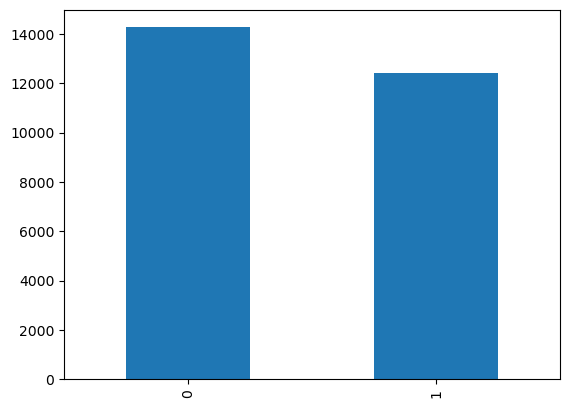

In [125]:
y.value_counts().plot(kind='bar')

<AxesSubplot: >

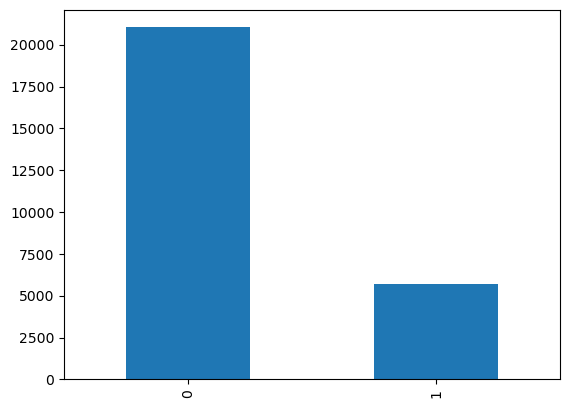

In [126]:
label.h1n1_vaccine.value_counts().plot(kind='bar')

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [142]:
logit=LogisticRegression(max_iter=2000)

In [143]:
logitmodel=logit.fit(X,y)

In [144]:
logitmodel.score(X,y)

0.7721571123675441

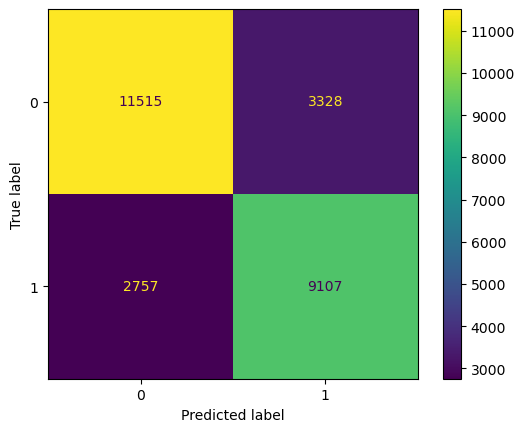

In [163]:
ConfusionMatrixDisplay.from_predictions(logit_predict,y)

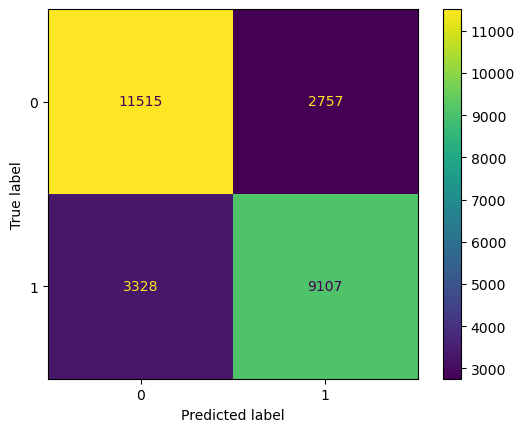

In [164]:
ConfusionMatrixDisplay.from_predictions(y,logit_predict)

In [145]:
logit_predict=logitmodel.predict(X)

In [146]:
print(classification_report(y,logit_predict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



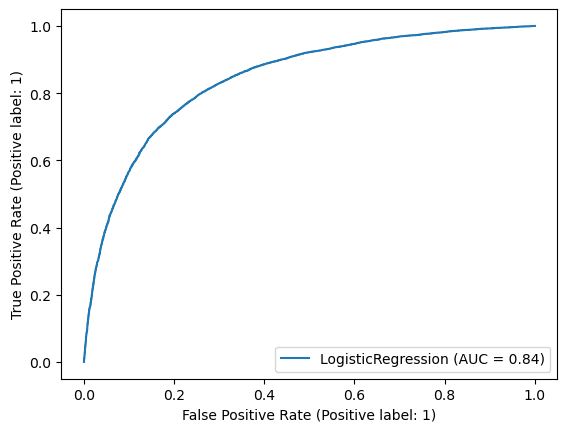

In [147]:
RocCurveDisplay.from_estimator(logit,X,y)

In [148]:
logith1n1=logit.fit(X,label.h1n1_vaccine)

In [149]:
logith1n1.score(X,label.h1n1_vaccine)

0.8307559815778635

In [150]:
logit_predicth1n1=logith1n1.predict(X)

In [151]:
print(classification_report(logit_predicth1n1,label.h1n1_vaccine))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     23313
           1       0.40      0.67      0.50      3394

    accuracy                           0.83     26707
   macro avg       0.67      0.76      0.70     26707
weighted avg       0.88      0.83      0.85     26707



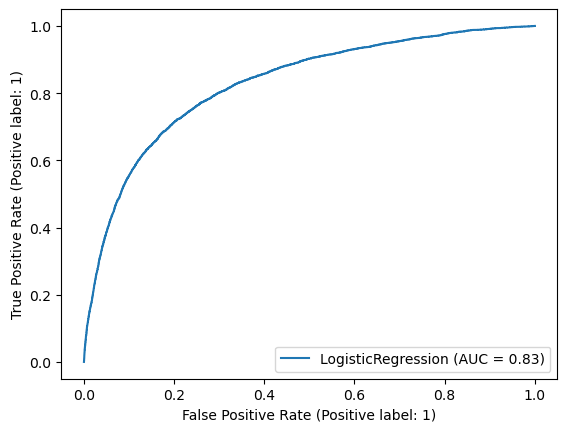

In [152]:
RocCurveDisplay.from_estimator(logit,X,label.h1n1_vaccine)

In [165]:
from sklearn.naive_bayes import CategoricalNB

In [166]:
nb=CategoricalNB()

In [167]:
nbmodel=nb.fit(X,y)

In [168]:
nbmodel.score(X,y)

0.7530235518777848

In [169]:
from sklearn.svm import SVC

In [170]:
svm=SVC()

In [171]:
svmmodel=svm.fit(X,y)

In [172]:
svmmodel.score(X,y)

0.7759014490582993

In [173]:
#Stacked Classifier:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [174]:
estimators=[
    ('tree',DecisionTreeClassifier()),
    ('rf',RandomForestClassifier()),
    ('gbm',GradientBoostingClassifier()),
    ('nb',CategoricalNB()),
    ('svm',SVC())
]

In [179]:
clf=StackingClassifier(estimators=estimators,
                      final_estimator=DecisionTreeClassifier())

In [180]:
clfmodel=clf.fit(X,y)

In [181]:
clfmodel.score(X,y)

0.6988804433294642

In [182]:
clfmodel.final_estimator

DecisionTreeClassifier()